In [1]:
import pandas as pd
import seaborn as sn
from sklearn import datasets

In [2]:
wine = datasets.load_wine()

In [3]:
print ("Features: ", wine.feature_names)

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [4]:
print ("Labels: ", wine.target_names)

Labels:  ['class_0' 'class_1' 'class_2']


In [5]:
wine.data.shape

(178, 13)

In [6]:
print (wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [7]:
print (wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109)

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
gnb = GaussianNB()

In [14]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
y_pred = gnb.predict(X_test)

In [17]:
from sklearn import metrics

In [18]:
print("Accuracy Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

Accuracy Naive Bayes: 0.9074074074074074


In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
neigh = KNeighborsClassifier(n_neighbors=12)

In [37]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [38]:
y_pred_knn = neigh.predict(X_test)

In [39]:
print("Accuracy K-NN:",metrics.accuracy_score(y_test, y_pred_knn))

Accuracy K-NN: 0.7037037037037037


In [40]:
from sklearn.svm import NuSVC
from sklearn.svm import SVC

In [45]:
clf = NuSVC(gamma='scale')
# clf = SVC(kernel="linear", C=0.025)
# clf = SVC(gamma=2, C=1)

In [46]:
clf.fit(X_train, y_train)

NuSVC(cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [47]:
y_pred_svm = clf.predict(X_test)

In [48]:
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy SVM: 0.8518518518518519


In [92]:
from sklearn.neural_network import MLPClassifier

In [93]:
#mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
mlp = MLPClassifier(alpha=1, max_iter=1000)

In [94]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [95]:
y_pred_mlp = mlp.predict(X_test)

In [96]:
print("Accuracy MLP:", metrics.accuracy_score(y_test, y_pred_mlp))

Accuracy MLP: 0.9444444444444444


In [74]:
from sklearn.metrics import confusion_matrix

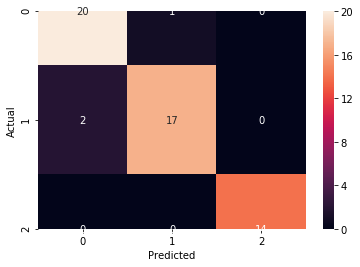

In [97]:
confusion_matrix = pd.crosstab(y_test, y_pred_mlp, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)